<a href="https://colab.research.google.com/github/RonanBERDY/AI-Enhanced-Snake-Optimizer/blob/main/AI_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   AI Agent that describes the image (vision tool)
*   AI agent that makes improvement suggestions(designer)

*   AI agent (product manager) that creates user stories and prioritizes them






In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks
from google.colab import drive
drive.mount('/content/drive')

/content/drive/MyDrive/Colab Notebooks
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import userdata
api_key = userdata.get('NoteBookLM')

In [ ]:
!pip install 'crewai[tools]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.1/252.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.3 MB/s eta 0:0

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.5.0
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.10.0.29.26
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4

In [ ]:
import os
os.environ["OPENAI_API_KEY"]=api_key

In [ ]:
from crewai import Agent, Crew, Task, Process, LLM
from crewai_tools import VisionTool
from IPython.display import display, Markdown

In [ ]:


llm = LLM(
    model="gpt-4o", # call model by provider/model_name
    temperature=0.8,
)

AI Agent to describe an image

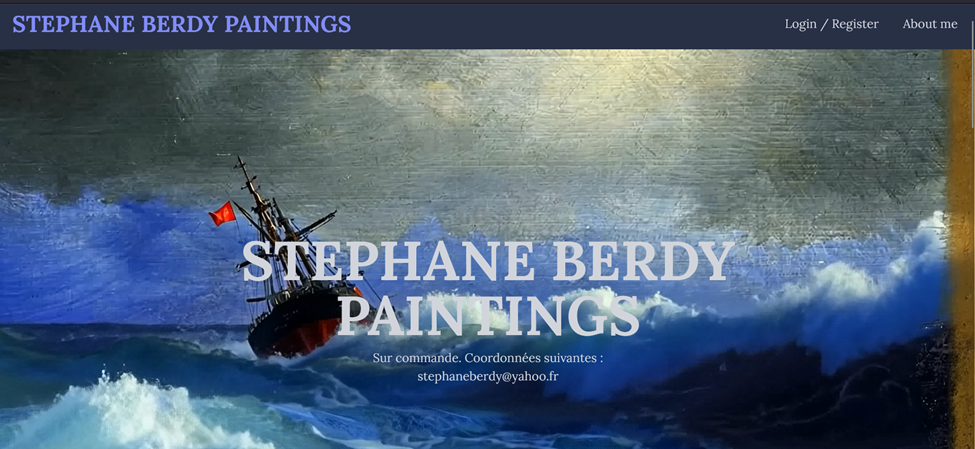

In [ ]:
from PIL import Image
image_path='image1.png'
image=Image.open('image1.png')
image

In [ ]:
vision_tool = VisionTool()
image_describer_agent = Agent(
    role='Image Description Specialist',
    goal=f'Accurately and comprehensively describe the content of image {image_path} provided to you.',
    backstory='You are an AI agent with expertise in visual recognition and detailed description. You can analyse images and provide textual summaries of their key elements.',
    tools=[vision_tool],
    llm=llm,
    verbose=True  # Enable logging for debugging, optional
)

In [ ]:
describe_image_task = Task(
    description="**Describe the main objects and scene in the following image",
    expected_output="A detailed textual description of the image.",
    agent=image_describer_agent,

)

second agent and task

In [ ]:
designer_agent = Agent(
    role='Improvement Suggestion Designer',
    goal='Provide insightful and actionable suggestions for improving the subject matter based on the provided description.',
    backstory='You are a creative AI agent with a keen eye for detail and a strong understanding of design principles and improvement methodologies. You can analyse textual descriptions and generate relevant recommendations.',
    tools=[vision_tool],
    llm=llm,
    verbose=True
)

improve_image_task = Task(
    description="**Review the provided description of the image and suggest three specific and actionable improvements related to the visual content, composition, or overall presentation.** Ensure your suggestions are concise and directly address potential enhancements.",
    expected_output="Three bullet points, each detailing a specific and actionable improvement suggestion for the image.",
    agent=designer_agent,
    context=[describe_image_task] # Assuming describe_image_task is the previous task
)

thirs ai agent

In [ ]:
product_management_agent = Agent(
    role='Image Enhancement Strategist',
    goal=f'Analyse improvement suggestions and outline how they could be implemented to enhance the visual content of an image {image_path} .',
    backstory=f'You are a product manager working for the development of the website of a painter art case.',
    verbose=True, # Set to True for more detailed output during execution
    tools=[vision_tool]
)

# **Define the Task for the Image Enhancement Strategist**
explain_enhancements_task = Task(
    description="**Review the following improvement suggestions for the image and describe in detail how each suggestion could be implemented to enhance the image.**",
    expected_output="A detailed paragraph for each suggestion, explaining the implementation steps.",
    agent=product_management_agent,
    context=[improve_image_task] # Assuming improve_image_task is the previous task
)

Build the team of agents

In [ ]:
image_description_crew = Crew(
    agents=[image_describer_agent,designer_agent,product_management_agent],
    tasks=[describe_image_task,improve_image_task,explain_enhancements_task],
    process=Process.sequential, # Tasks will be executed in the order they are defined [6, 7]
    verbose=True # Set to True for more detailed output during crew execution [4]
)

# **5. Kick off the Crew to execute the task**
result = image_description_crew.kickoff()
print(result)

 
[2025-03-14 09:51:46][🚀 CREW 'CREW' STARTED, 0165E3CE-FF1F-4871-B3D1-E9B229521F72]: 2025-03-14 09:51:46.741234
 
[2025-03-14 09:51:46][📋 TASK STARTED: **DESCRIBE THE MAIN OBJECTS AND SCENE IN THE FOLLOWING IMAGE]: 2025-03-14 09:51:46.755332
 
[2025-03-14 09:51:46][🤖 AGENT 'IMAGE DESCRIPTION SPECIALIST' STARTED TASK]: 2025-03-14 09:51:46.757028
# Agent: Image Description Specialist
## Task: **Describe the main objects and scene in the following image
 
[2025-03-14 09:51:46][🤖 LLM CALL STARTED]: 2025-03-14 09:51:46.757263
 
[2025-03-14 09:51:47][✅ LLM CALL COMPLETED]: 2025-03-14 09:51:47.898963
 
[2025-03-14 09:51:47][🤖 TOOL USAGE STARTED: 'VISION TOOL']: 2025-03-14 09:51:47.899398
 
[2025-03-14 09:51:50][✅ TOOL USAGE FINISHED: 'VISION TOOL']: 2025-03-14 09:51:50.485541


# Agent: Image Description Specialist
## Using tool: Vision Tool
## Tool Input: 
"{\"image_path_url\": \"image1.png\"}"
## Tool Output: 
The image appears to be a website header for "Stephane Berdy Paintings." It feat

In [ ]:
print(f"### Task Performed by: **{image_describer_agent}**\n")
print(f"**Task Description:** {describe_image_task.output.description}\n")
print(f"**Task Output: {describe_image_task.output.raw}**\n")


### Task Performed by: **id=UUID('ba6318fa-1589-4ea5-9ce5-d342aed131e2') formatting_errors=0 role='Image Description Specialist' goal='Accurately and comprehensively describe the content of image image1.png provided to you.' backstory='You are an AI agent with expertise in visual recognition and detailed description. You can analyse images and provide textual summaries of their key elements.' config=None cache=True verbose=True max_rpm=None allow_delegation=False tools=[VisionTool(name='Vision Tool', description="Tool Name: Vision Tool\nTool Arguments: {'image_path_url': {'description': None, 'type': 'str'}}\nTool Description: This tool uses OpenAI's Vision API to describe the contents of an image.", args_schema=<class 'crewai_tools.tools.vision_tool.vision_tool.ImagePromptSchema'>, description_updated=False, cache_function=<function BaseTool.<lambda> at 0x7cddb05060c0>, result_as_answer=False)] max_iter=25 agent_executor=<crewai.agents.crew_agent_executor.CrewAgentExecutor object at 0

In [ ]:
for idx,tasks_output in enumerate(result.tasks_output):
    display(Markdown(f"Agent {idx+1} : {tasks_output.agent}\n {tasks_output.raw}"))

Agent 1 : Image Description Specialist
 The image depicts the header of a website dedicated to "Stephane Berdy Paintings." The central focus is a painting of a ship navigating tumultuous seas, with striking waves and a visible flag, suggesting a maritime theme. The website layout includes navigational elements such as a login/register option and an "About Me" section. Additionally, there is contact information presented in French, indicating the artist's potential connection to French-speaking regions. Prominently displayed is the website's title, "STEPHANE BERDY PAINTINGS," which suggests the website is an online gallery or portfolio showcasing the artist's work.

Agent 2 : Improvement Suggestion Designer
 - **Enhance Image Clarity and Focus**: To make the painting of the ship navigating tumultuous seas more visually striking, ensure the image is high-resolution and well-lit. This could involve adjusting contrast and brightness to highlight the details of the waves and the flag, making the maritime theme more vivid and engaging for visitors.

- **Improve Navigation and UI Design**: Ensure that the website's navigational elements, such as the login/register option and the "About Me" section, are intuitively placed and visually distinct. This can be achieved by using consistent and clear font styles, colors, and sizes that harmonize with the overall theme of the website, aiding in ease of navigation.

- **Optimize Language Accessibility**: Given the contact information is presented in French, consider providing a language toggle option for non-French speaking visitors. This will enhance accessibility and inclusivity, allowing a broader audience to engage with the artist's work and information effectively.

Agent 3 : Image Enhancement Strategist
 1. **Enhance Image Clarity and Focus**: To enhance the clarity and focus of the painting of the ship navigating tumultuous seas, one should start by ensuring that the image is captured in a high resolution to prevent pixelation when viewed on larger screens. After obtaining a high-resolution image, it's crucial to adjust the brightness and contrast levels using photo editing software such as Adobe Photoshop or GIMP. Increasing the contrast will help in emphasizing the details of the waves and the flag, making them pop against the turbulent sea. Additionally, applying sharpening filters can further accentuate the fine details within the painting. Finally, considering the overall composition, the image should be strategically cropped to ensure that it draws immediate attention to the ship while maintaining the dramatic sea as a backdrop. Adjusting color balance might also help to bring out the maritime colors, enhancing the vividness of the scene.

2. **Improve Navigation and UI Design**: For an optimal user experience on the website, the navigation elements need to be placed intuitively and made visually distinct. Begin by evaluating the current layout and access patterns. This can involve gathering user feedback regarding how easily they locate the login, registration, and "About Me" sections. Based on this feedback, reposition these elements to ensure that they are readily accessible—ideally at the top of the page or within a floating sidebar. Once placement is refined, ensure that these elements use a consistent and visually appealing font that embodies the theme of the maritime artwork. Establish a harmonious color palette that contrasts with the background to make these navigation items stand out while resonating with the overall aesthetic. Consider implementing hover effects that further highlight these elements when users navigate the site, providing a modern, interactive feel.

3. **Optimize Language Accessibility**: To make the contact information and other content more accessible, especially since parts are in French, implementing a language toggle feature on the website would be highly beneficial. Begin by identifying key sections of the site that require translation and then ensure that these sections can be easily switched between languages. This can be done through an accessible dropdown menu at a prominent position on the page, ideally within the top navigation bar. Once the toggle is in place, consider integrating machine translation services or hiring professional translators to provide accurate and contextually relevant translations. This will allow non-French speaking visitors to comfortably access the artist's work and information. Additionally, a brief introductory message about the bilingual nature of the site can be included to inform visitors upon their first visit, enhancing their overall experience and inclusivity.

These enhancements will not only elevate the visual impact of the website but also improve user engagement and broaden the artist's audience.